<a href="https://colab.research.google.com/github/Aswinramesh04/100-DaysOfCode-DataScience/blob/main/Day41_Non_Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            Day41 Non-Linear SVM         By: Loga Aswin

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv('/content/letter-recognition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [12]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [14]:
df.shape

(20000, 17)

In [15]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

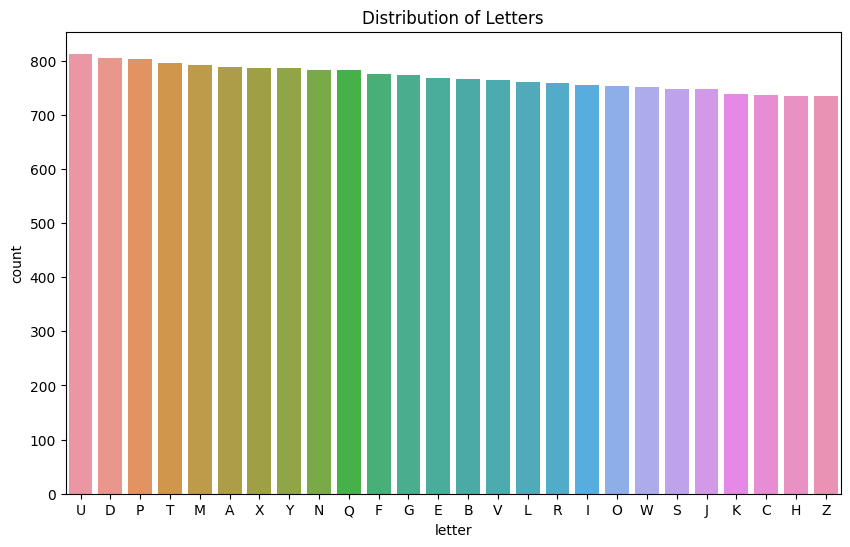

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='letter', order=df['letter'].value_counts().index)
plt.title("Distribution of Letters")
plt.show()

In [35]:
# Prepare the data for modeling
X = df.drop('letter', axis=1)
y = df['letter']

In [39]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
# Train a non-linear SVM model (e.g., using a radial basis function kernel)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=101)
svm.fit(X_train, y_train)

SVC(random_state=101)

In [42]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.99      0.99       149
           B       0.87      0.96      0.91       153
           C       0.98      0.92      0.95       137
           D       0.88      0.98      0.93       156
           E       0.91      0.96      0.93       141
           F       0.90      0.96      0.93       140
           G       0.92      0.96      0.94       160
           H       0.97      0.82      0.89       144
           I       0.98      0.93      0.95       146
           J       0.94      0.96      0.95       149
           K       0.91      0.90      0.91       130
           L       0.99      0.93      0.96       155
           M       0.98      0.99      0.99       168
           N       0.98      0.93      0.95       151
           O       0.92      0.94      0.93       145
           P       0.99      0.89      0.94       173
           Q       0.99      0.98      0.9

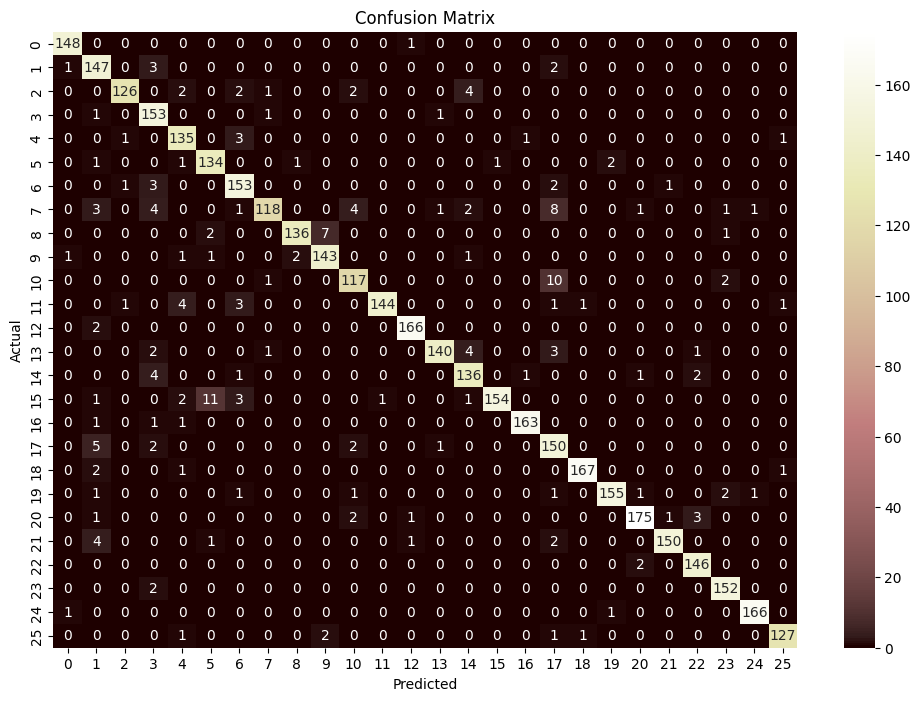

In [46]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()